## TASK - 1
# To Predict the Stock Price of any Company Using LSTM

### Importing libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2. Loading the dataset

#### 2.1 Reading and viewing the dataset using pandas

In [26]:
df = pd.read_csv('Nifty_50.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [12]:
# view the dimensions of df
df.shape

(3322, 15)

#### 2.2 Understanding the data/Variables

**`Date`**: Date of the recorded data in "DD-MM-YYYY" format.

**`Symbol`**: Stock symbol or ticker symbol of the company (e.g., "MUNDRAPORT").

**`Series`**: Series of the stock (e.g., "EQ" for Equity).

**`Prev Close`**: Previous day's closing price of the stock.

**`Open`**: Opening price of the stock on the given date.

**`High`**: Highest price at which the stock was traded during the day.

**`Low`**: Lowest price at which the stock was traded during the day.

**`Last`**: Last traded price of the stock on the given day.

**`Close`**: Closing price of the stock on the given day.

**`VWAP`**: Volume Weighted Average Price of the stock on the given day.

**`Volume`**: Total volume of shares traded on the given day
.
**`Turnover`**: Total monetary value of all trades in a specific period.

**`Trades`**: Total number of trades that occurred on the given day.

**`Deliverable Volume`**: Volume of shares that were traded and actually delivered on the given day.

**`%Deliverble`**: Percentage of deliverable quantity to traded quantity, indicating the portion of trades resulting in actual delivery of shares.

### 3. Data Preprocessing

#### 3.1 Data Statistics

In [27]:
# view dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [28]:
# view descriptive Statistics
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [29]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [30]:
# checking for null values
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [31]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

Text(0, 0.5, 'Count')

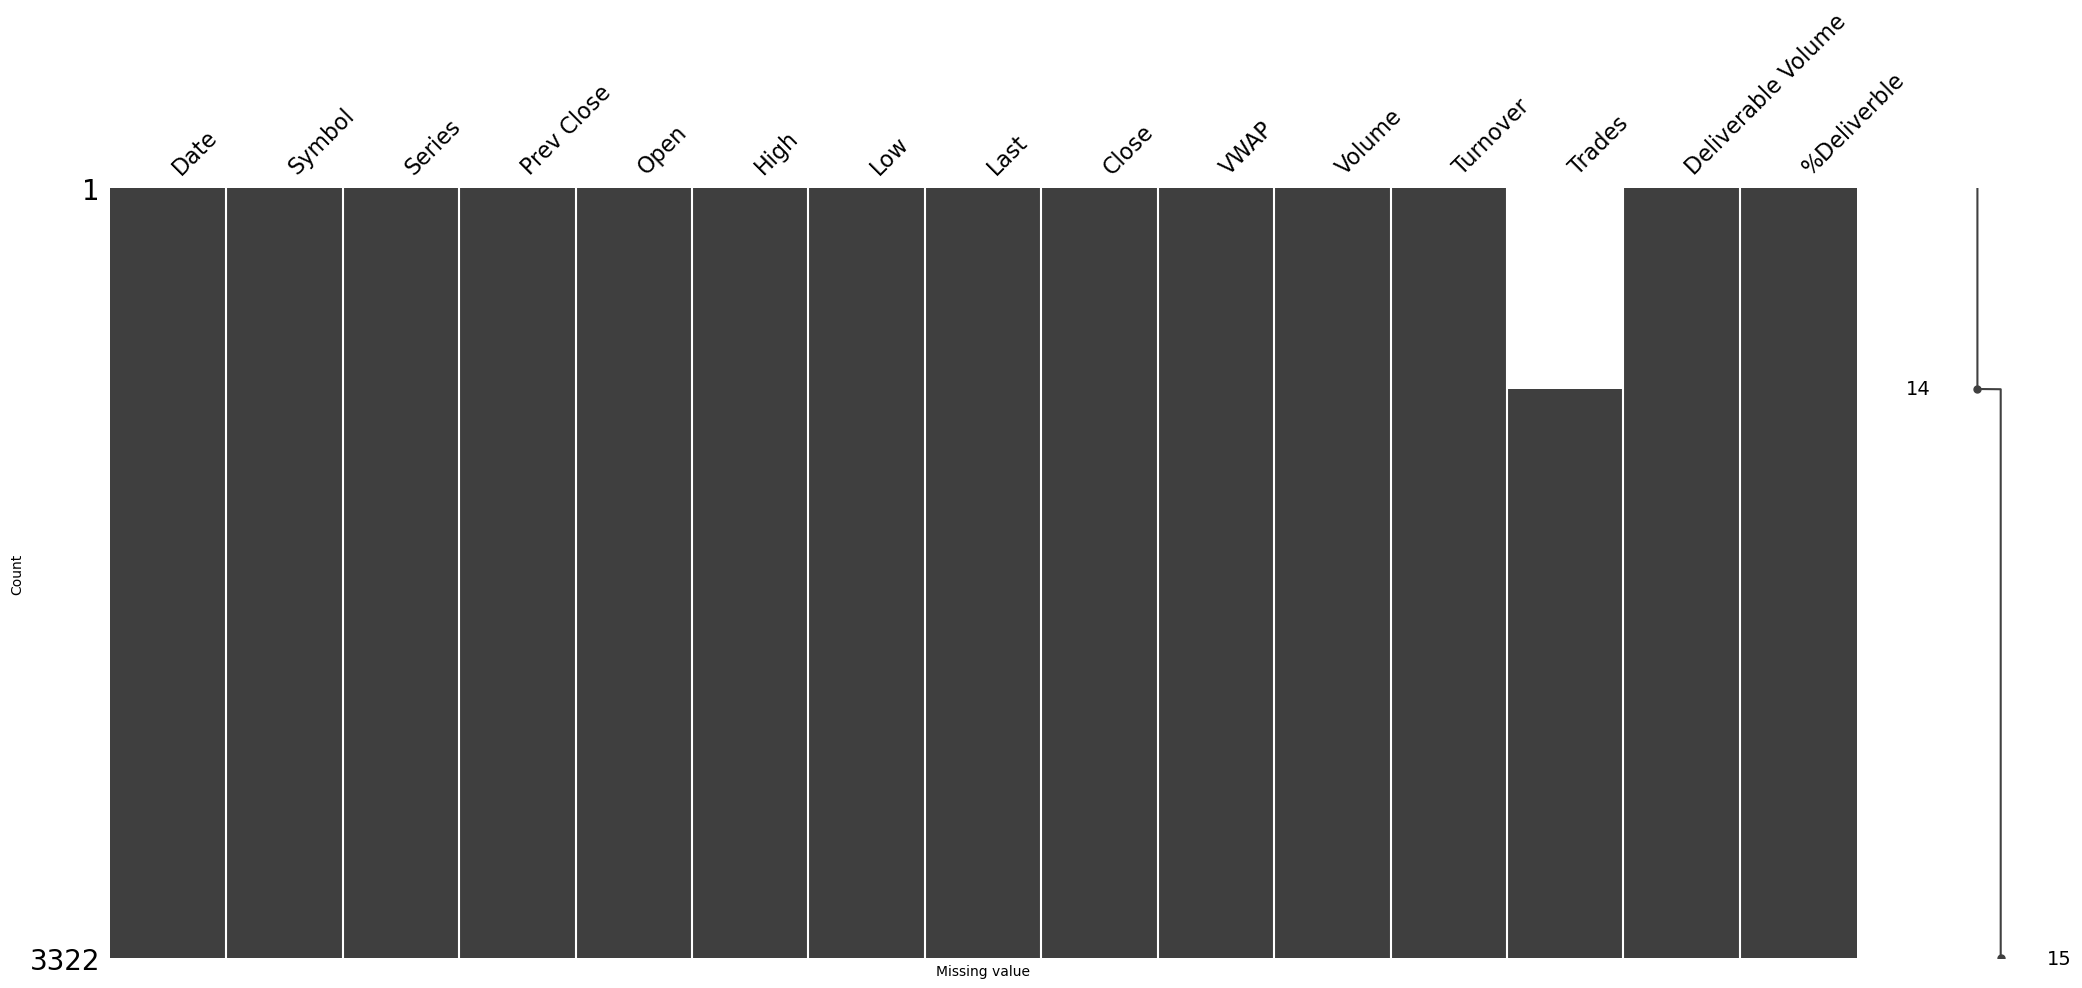

In [32]:
# Visualizing the missing data
import missingno as msno
msno.matrix(df)
plt.xlabel("Missing value")
plt.ylabel("Count")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

#### 3.2 Select a one-year period from the dataset and create a DataFrame named Stockprice_one_year. Utilize this newly created DataFrame for subsequent analyses.

In [34]:
stock_price_one_year = df[(df['Date']>'2011-03-31') & (df['Date']<'2012-04-01')]
stock_price_one_year

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
826,2011-04-01,MUNDRAPORT,EQ,136.65,138.00,142.25,137.50,141.00,141.15,140.36,1716486,2.409280e+13,NaN,965478,0.5625
827,2011-04-04,MUNDRAPORT,EQ,141.15,142.35,149.10,141.50,148.95,148.20,146.00,1125553,1.643326e+13,NaN,501391,0.4455
828,2011-04-05,MUNDRAPORT,EQ,148.20,148.50,158.00,148.05,157.00,156.85,154.12,1712167,2.638708e+13,NaN,475131,0.2775
829,2011-04-06,MUNDRAPORT,EQ,156.85,158.00,158.40,152.25,154.15,153.65,155.05,934007,1.448215e+13,NaN,424174,0.4541
830,2011-04-07,MUNDRAPORT,EQ,153.65,154.75,157.00,152.70,155.75,155.75,154.85,1042870,1.614923e+13,NaN,663880,0.6366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,2012-03-26,ADANIPORTS,EQ,123.45,123.00,123.70,119.05,119.75,120.55,121.00,1124699,1.360846e+13,14021.0,602271,0.5355
1071,2012-03-27,ADANIPORTS,EQ,120.55,121.55,123.00,118.25,121.65,121.50,120.66,1098462,1.325451e+13,14310.0,487096,0.4434
1072,2012-03-28,ADANIPORTS,EQ,121.50,121.50,121.50,117.00,118.55,118.25,118.44,1756343,2.080279e+13,26906.0,1083219,0.6167
1073,2012-03-29,ADANIPORTS,EQ,118.25,118.00,125.50,116.10,124.15,124.20,120.57,2869127,3.459164e+13,29996.0,1933482,0.6739


In [35]:
stock_price_one_year.isnull().sum()

Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                40
Deliverable Volume     0
%Deliverble            0
dtype: int64

In [36]:
stock_price_one_year.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,209.000000,2.490000e+02,249.000000
mean,144.573293,144.885141,147.858635,141.528916,144.489357,144.544578,144.662289,1.535630e+06,2.207001e+13,13896.727273,9.089178e+05,0.534747
std,12.124482,12.221643,12.205498,12.348991,12.179215,12.151759,12.291169,1.673377e+06,2.535781e+13,7357.804577,1.350635e+06,0.137184
min,114.700000,117.500000,120.900000,111.000000,115.000000,114.700000,115.900000,2.209200e+04,3.235358e+11,417.000000,9.831000e+03,0.186900
25%,135.600000,135.000000,137.950000,131.950000,135.000000,135.500000,135.080000,7.216570e+05,1.043463e+13,8995.000000,3.379690e+05,0.438000
50%,146.800000,147.100000,149.800000,143.750000,146.600000,146.800000,146.690000,1.145520e+06,1.675321e+13,12293.000000,6.325790e+05,0.542200
75%,154.750000,155.050000,157.750000,151.650000,154.400000,154.750000,155.010000,1.744030e+06,2.530024e+13,17565.000000,1.029768e+06,0.620800
max,165.000000,165.050000,170.450000,163.550000,165.400000,165.000000,166.370000,2.066316e+07,3.322895e+14,46546.000000,1.726969e+07,0.943300


In [37]:
stock_price_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 826 to 1074
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                249 non-null    object 
 1   Symbol              249 non-null    object 
 2   Series              249 non-null    object 
 3   Prev Close          249 non-null    float64
 4   Open                249 non-null    float64
 5   High                249 non-null    float64
 6   Low                 249 non-null    float64
 7   Last                249 non-null    float64
 8   Close               249 non-null    float64
 9   VWAP                249 non-null    float64
 10  Volume              249 non-null    int64  
 11  Turnover            249 non-null    float64
 12  Trades              209 non-null    float64
 13  Deliverable Volume  249 non-null    int64  
 14  %Deliverble         249 non-null    float64
dtypes: float64(10), int64(2), object(3)
memory usage: 31.1

### 4. Data Visualization

#### 4.1 Compare the plot of 'feature_name' from Stockprice_one_year with the plot of 'feature_name' from the original dataframe df.

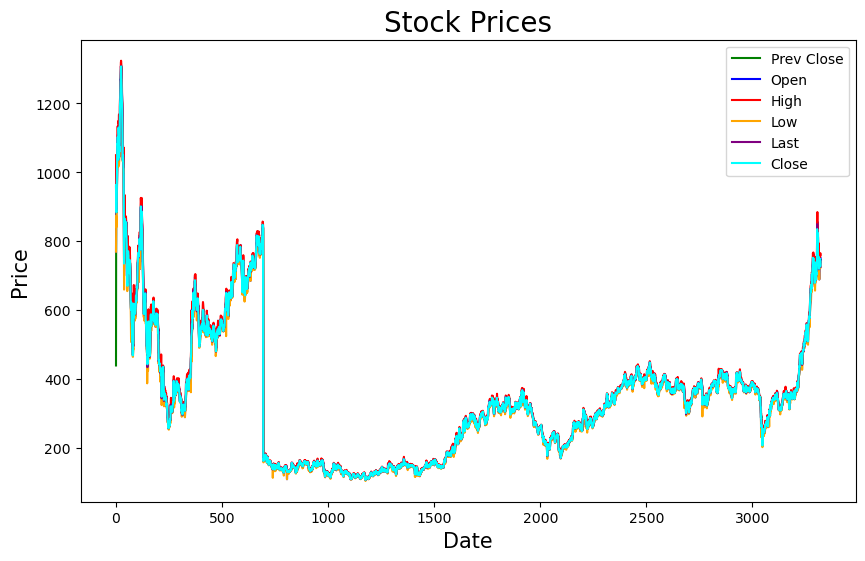

In [38]:
# Create subplots with 1 row and 1 column
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data with specified colors
ax.plot(df['Prev Close'], label='Prev Close', color='green')
ax.plot(df['Open'], label='Open', color='blue')
ax.plot(df['High'], label='High', color='red')
ax.plot(df['Low'], label='Low', color='orange')
ax.plot(df['Last'], label='Last', color='purple')
ax.plot(df['Close'], label='Close', color='cyan')

# Set labels, title, and legend at the lower right corner
ax.set_xlabel('Date', size=15)
ax.set_ylabel('Price', size=15)
ax.set_title('Stock Prices', size=20)
ax.legend(loc='upper right')

# Display the plot
plt.show()

#### 4.2 Calculate the correlation between the features and create a heatmap visualization. 

<AxesSubplot:>

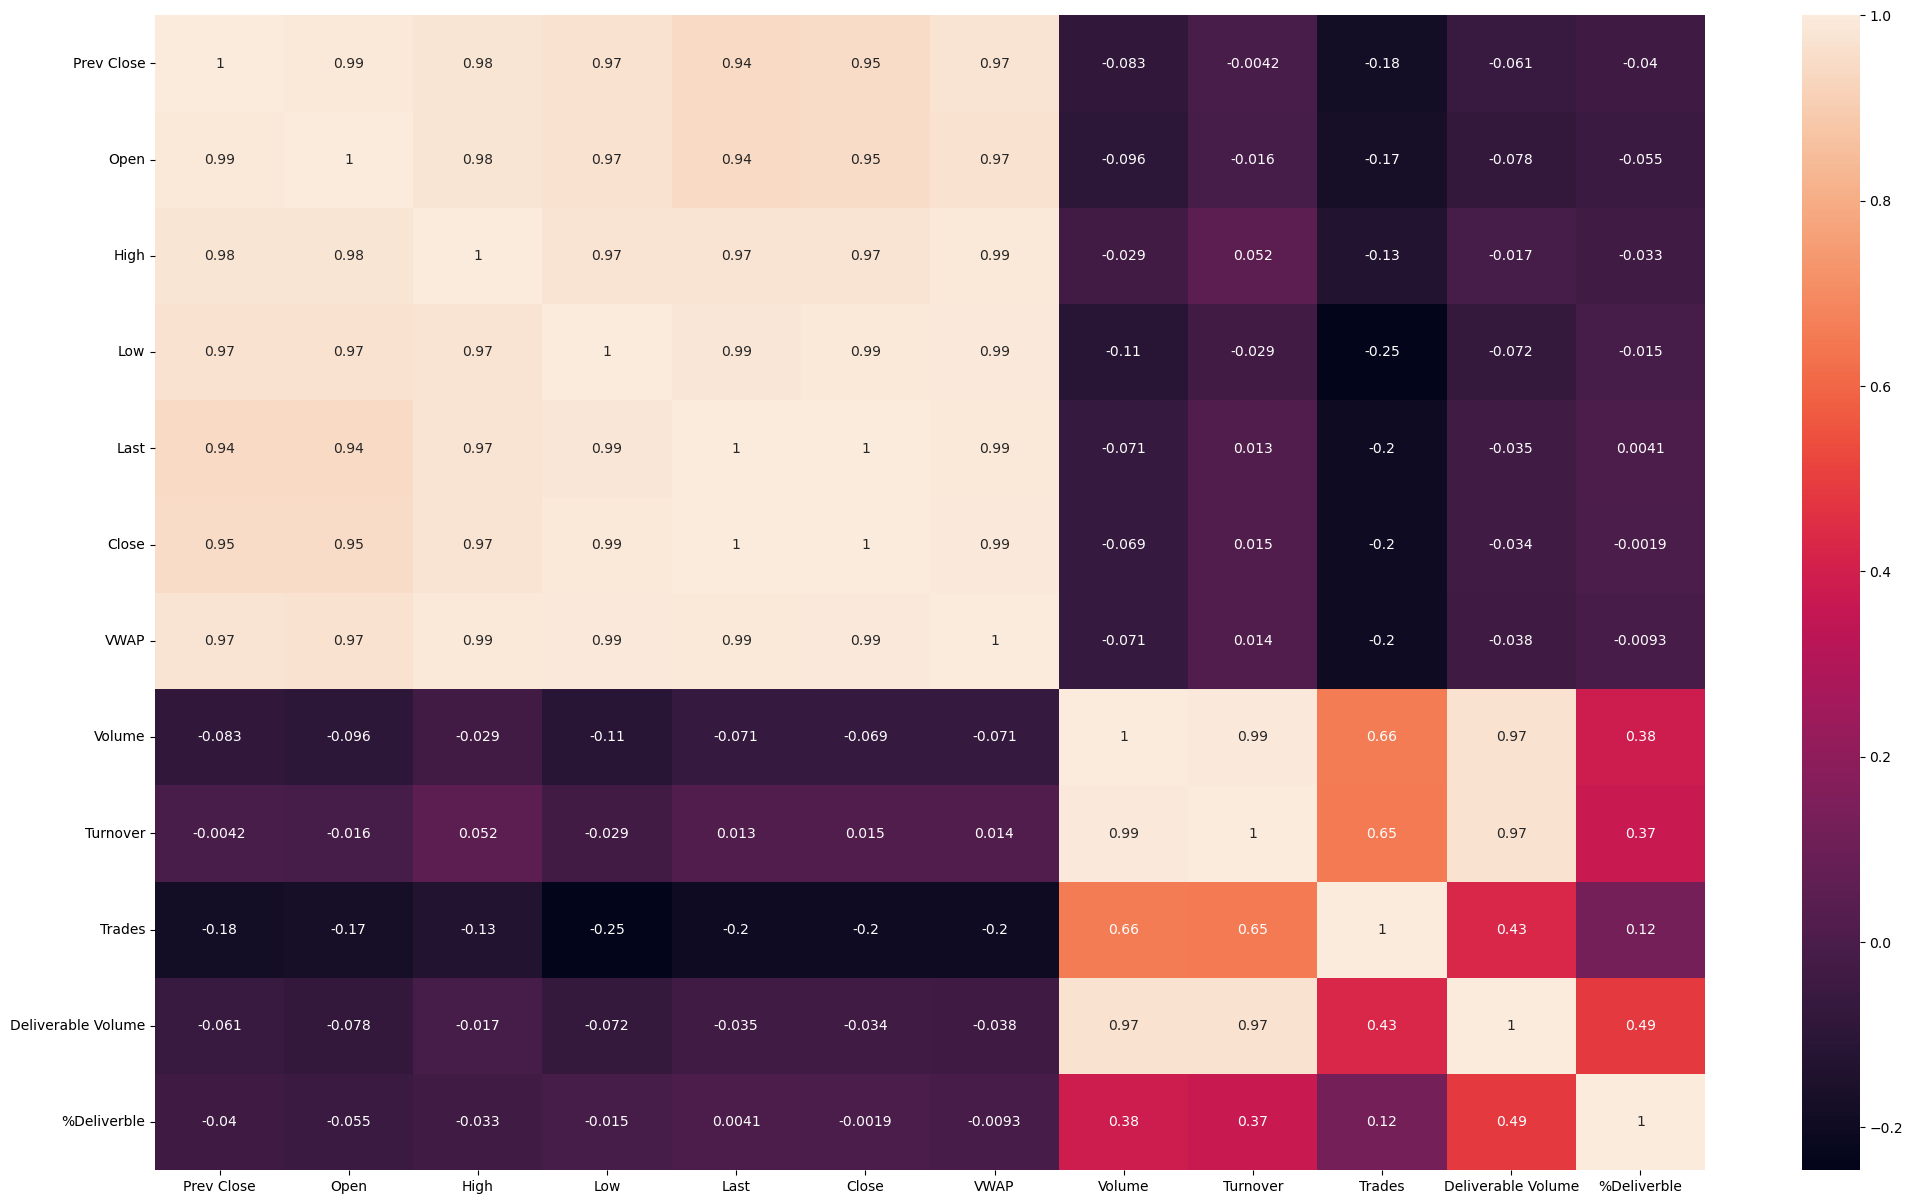

In [39]:
df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(stock_price_one_year.corr(method = 'pearson'),annot = True)

#### **Observations:**

- Based on the heatmap analysis, it can be deduced that 'Prev Close,' 'Open,' 'High,' 'Low,' 'Last,' 'Close,' and 'VWAP' exhibit strong correlations among themselves. 
- Similarly, 'Volume,' 'Turnover,' 'Trades,' 'Deliverable Volume,' and '%Deliverable' also display significant correlations within their respective groups.

#### 4.3 Plotting multiple features in a single plot by using different colors: represent "LOW" with a red line, "HIGH" with a green line, and "CLOSE" with a black line.

<AxesSubplot:xlabel='Date'>

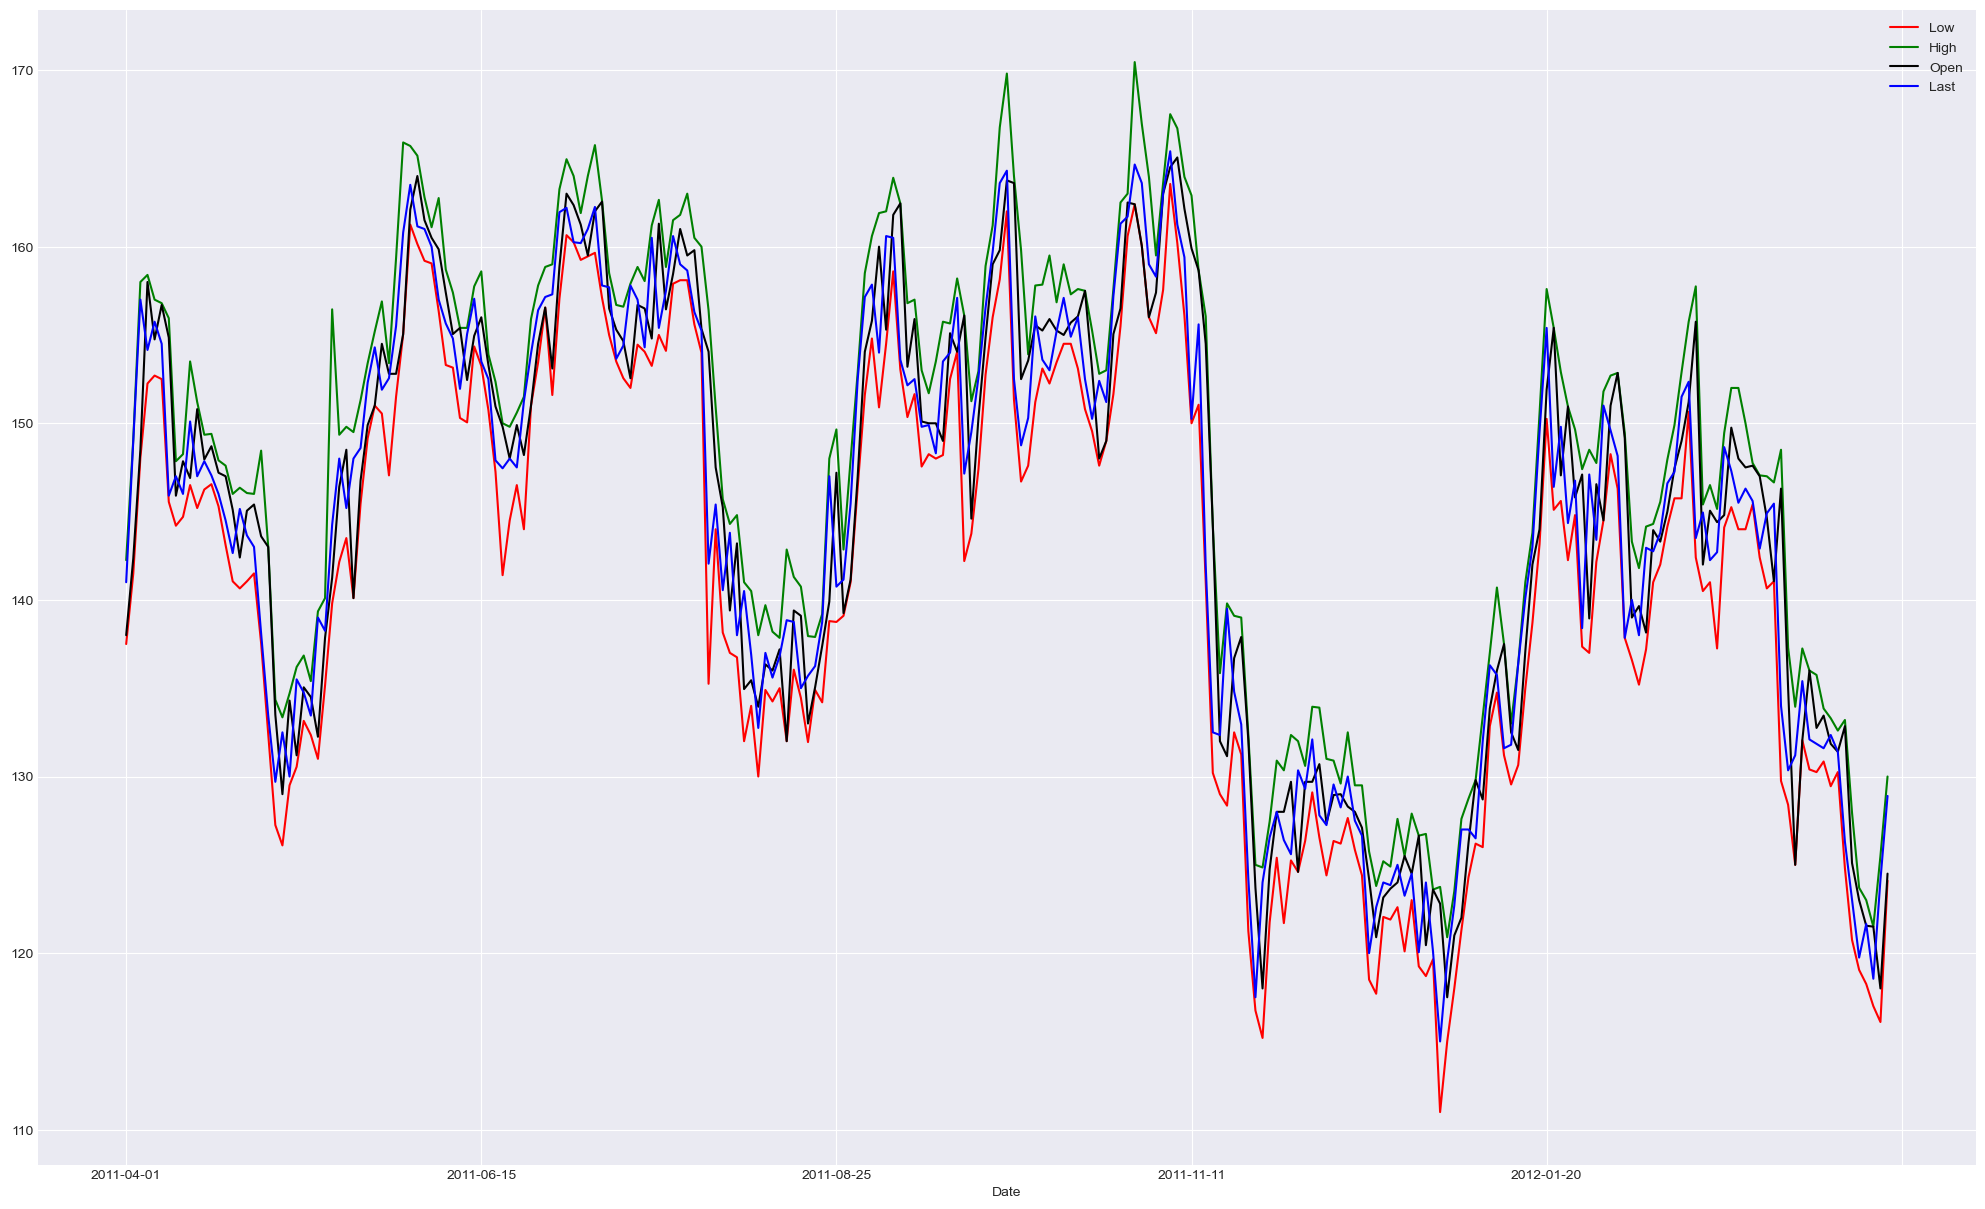

In [40]:
plt.style.use('seaborn-darkgrid')
stock_price_one_year.plot(x = 'Date', y = ['Low','High','Open','Last'],color = ['r','g','k','b','y'],figsize = [25,15])

#### 4.4 Using Matplotlib library to fill the area between two horizontal curves.To shade the region between 'LOW' and 'HIGH' values in a plot.

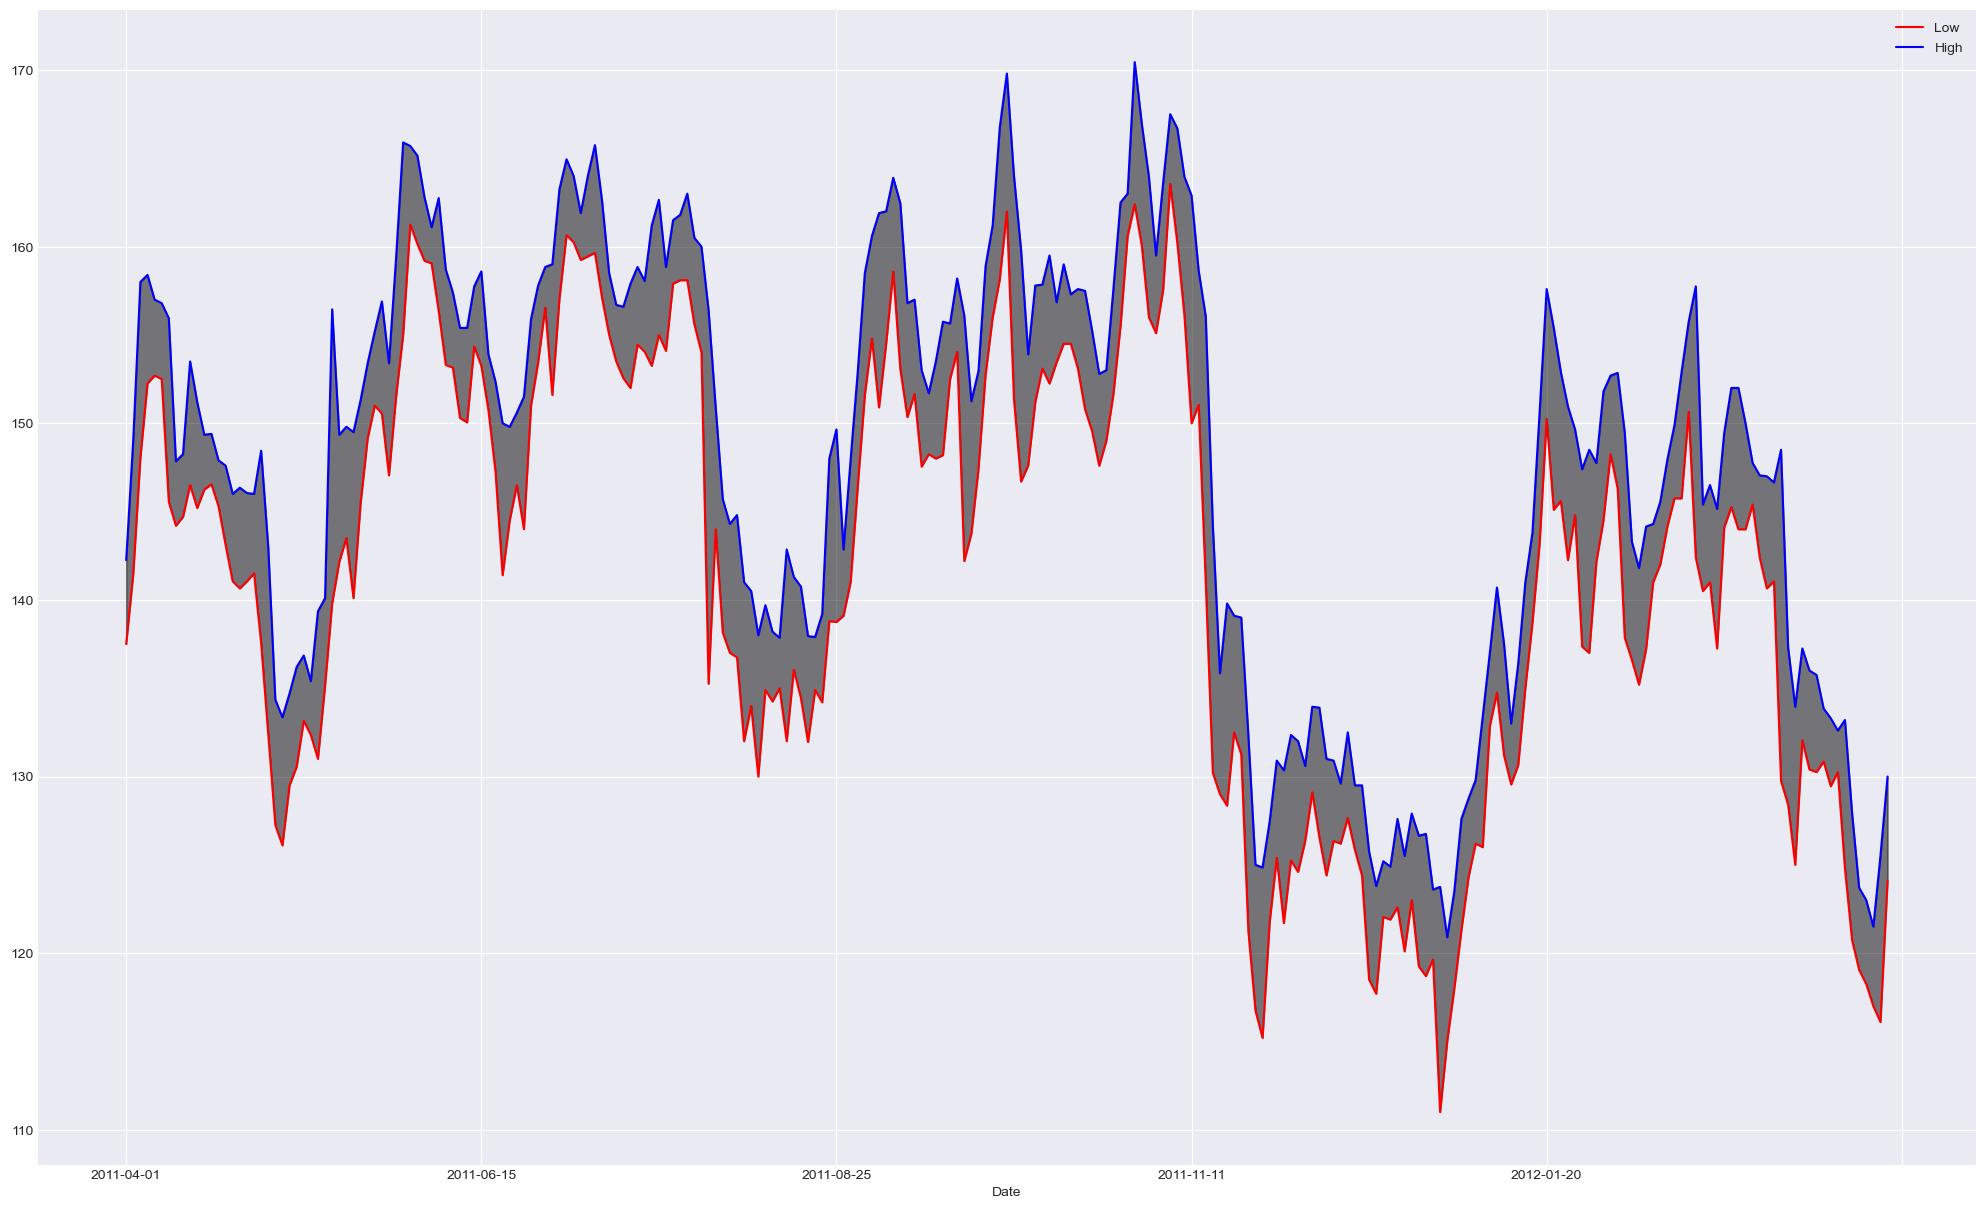

In [41]:
stock_price_one_year.plot(x = 'Date', y = ['Low','High'],color = ['r','b'],figsize = [25,15])
plt.fill_between(stock_price_one_year['Date'],stock_price_one_year['Low'],stock_price_one_year['High'],color = 'k',alpha=0.5)
plt.show()

### 5.Feature Engineering

#### 5.1. Generating New Features based on Important features

In [42]:
data =df[['Date','Open','High','Low','Volume','VWAP']]

#### 5.2. Setting Index as Date

In [43]:
df.set_index('Date',drop=False,inplace=True)

#### 5.3. Visual Represenatation of closing price

<AxesSubplot:xlabel='Date'>

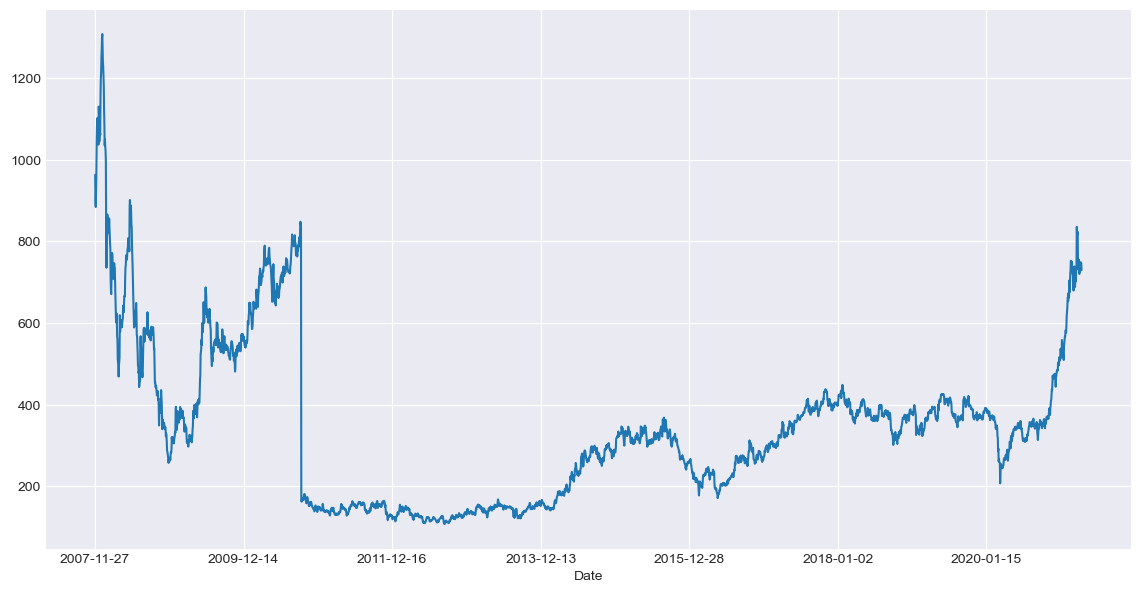

In [44]:
df.Close.plot(figsize=(14,7))


#### 5.4. Generating New Features-Lag and Window Features for features related to closing Price

In [45]:
df.reset_index(drop = True, inplace = True)
lag_features = ['Open','High','Low','VWAP']
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window = window1, min_periods = 0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window = window2, min_periods = 0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

#### 5.5. Setting All Null/NaN Values of a feature as a means of that feature

In [46]:
df.fillna(df.mean(),inplace=True)

#### 5.6. Setting Date as Index and Viewing the Datset

In [47]:
df.set_index('Date',drop = False, inplace = True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,9859619,0.3612,344.660461,10.534460,351.568756,9.889783,337.428741,10.137927,344.800476,9.702687
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,1453278,0.3172,770.000000,10.534460,1050.000000,9.889783,770.000000,10.137927,984.719971,9.702687
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,1069678,0.2088,877.000000,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,1260913,0.2735,887.666687,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,816123,0.2741,927.666687,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066


#### 5.7. Extracting Date Time Features from the dataset

In [48]:
df.Date = pd.to_datetime(df.Date, format ='%Y-%m-%d')
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day
df['Day_of_Week'] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,Day_of_Week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,10.534460,351.568756,9.889783,337.428741,10.137927,344.800476,9.702687,11,27,1
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,10.534460,1050.000000,9.889783,770.000000,10.137927,984.719971,9.702687,11,28,2
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008,11,29,3
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303,11,30,4
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066,12,3,0


#### 5.8. Removing unnecessary features

In [49]:
df = df.drop(columns = ['Symbol'])
df = df.drop(columns = ['Series'])

### 6. Model Building

#### 6.1. Splitting Dataset into Training and Testing Data

In [51]:
df_train = df[df.Date < '2018']
df_valid = df[df.Date >= '2018']

In [52]:
df_valid.shape

(823, 24)

In [53]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [29]:
df_train.head().T

Date,2007-11-27,2007-11-28,2007-11-29,2007-11-30,2007-12-03
Date,2007-11-27 00:00:00,2007-11-28 00:00:00,2007-11-29 00:00:00,2007-11-30 00:00:00,2007-12-03 00:00:00
Prev Close,440.0,962.9,893.9,884.2,921.55
Open,770.0,984.0,909.0,890.0,939.75
High,1050.0,990.0,914.75,958.0,995.0
Low,770.0,874.0,841.0,890.0,922.0
Last,959.0,885.0,887.0,929.0,980.0
Close,962.9,893.9,884.2,921.55,969.3
VWAP,984.72,941.38,888.09,929.17,965.65
Volume,27294366,4581338,5124121,4609762,2977470
Turnover,2687719053785000.0,431276530165000.0,455065846265000.0,428325662830000.0,287519974300000.0


#### 6.2. Scaling Data and Transforming it for Training

In [54]:
y_train = df_train['Close']
scaler = MinMaxScaler(feature_range = (0,1))
y_train1 = scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn = df_train['Close'].to_numpy().reshape(-1,1)

In [55]:
y_valid = df_valid['Close']
scaler1 = MinMaxScaler(feature_range = (0,1))
y_valid1 = scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid['Close'].to_numpy().reshape(-1,1)

In [56]:
x_train = df_train.drop(columns = ['Close'])
x_train1 = x_train.drop('Date',axis = 1)
x_train1 = (x_train1-x_train1.min())/(x_train1.max()-x_train1.min())
x_train2 = pd.concat((x_train1,x_train.Date),1)

In [57]:
x_valid = df_valid.drop(columns = ['Close'])
x_valid1 = x_valid.drop('Date',axis = 1)
x_valid1 = (x_valid1-x_valid1.min())/(x_valid1.max()-x_valid1.min())
x_valid2 = pd.concat((x_valid1,x_valid.Date),1)

In [58]:
x_train3 = x_train2.drop(columns = ['Date']).to_numpy()
x_valid3 = x_valid2.drop(columns = ['Date']).to_numpy()

In [59]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

#### 6.3. Importing XGBoost Library

In [60]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

### 7. Model Training

In [62]:
xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.01)
xgb
xgb.fit(x_train3,y_train1,eval_set = [(x_train3,y_train1),(x_valid3,y_valid1)],early_stopping_rounds = 100,verbose = True)

[0]	validation_0-rmse:0.17557	validation_1-rmse:0.19240
[1]	validation_0-rmse:0.17385	validation_1-rmse:0.19059
[2]	validation_0-rmse:0.17214	validation_1-rmse:0.18881
[3]	validation_0-rmse:0.17046	validation_1-rmse:0.18704
[4]	validation_0-rmse:0.16878	validation_1-rmse:0.18529
[5]	validation_0-rmse:0.16713	validation_1-rmse:0.18355
[6]	validation_0-rmse:0.16549	validation_1-rmse:0.18184
[7]	validation_0-rmse:0.16387	validation_1-rmse:0.18014
[8]	validation_0-rmse:0.16226	validation_1-rmse:0.17846
[9]	validation_0-rmse:0.16067	validation_1-rmse:0.17681
[10]	validation_0-rmse:0.15909	validation_1-rmse:0.17516
[11]	validation_0-rmse:0.15753	validation_1-rmse:0.17352
[12]	validation_0-rmse:0.15599	validation_1-rmse:0.17191
[13]	validation_0-rmse:0.15446	validation_1-rmse:0.17032
[14]	validation_0-rmse:0.15295	validation_1-rmse:0.16883
[15]	validation_0-rmse:0.15145	validation_1-rmse:0.16726
[16]	validation_0-rmse:0.14996	validation_1-rmse:0.16581
[17]	validation_0-rmse:0.14850	validation

[144]	validation_0-rmse:0.04281	validation_1-rmse:0.05814
[145]	validation_0-rmse:0.04240	validation_1-rmse:0.05772
[146]	validation_0-rmse:0.04199	validation_1-rmse:0.05732
[147]	validation_0-rmse:0.04158	validation_1-rmse:0.05693
[148]	validation_0-rmse:0.04118	validation_1-rmse:0.05653
[149]	validation_0-rmse:0.04078	validation_1-rmse:0.05611
[150]	validation_0-rmse:0.04038	validation_1-rmse:0.05572
[151]	validation_0-rmse:0.03999	validation_1-rmse:0.05534
[152]	validation_0-rmse:0.03961	validation_1-rmse:0.05497
[153]	validation_0-rmse:0.03922	validation_1-rmse:0.05459
[154]	validation_0-rmse:0.03884	validation_1-rmse:0.05422
[155]	validation_0-rmse:0.03847	validation_1-rmse:0.05388
[156]	validation_0-rmse:0.03810	validation_1-rmse:0.05348
[157]	validation_0-rmse:0.03773	validation_1-rmse:0.05312
[158]	validation_0-rmse:0.03736	validation_1-rmse:0.05276
[159]	validation_0-rmse:0.03700	validation_1-rmse:0.05241
[160]	validation_0-rmse:0.03665	validation_1-rmse:0.05206
[161]	validati

[285]	validation_0-rmse:0.01118	validation_1-rmse:0.03008
[286]	validation_0-rmse:0.01107	validation_1-rmse:0.02999
[287]	validation_0-rmse:0.01097	validation_1-rmse:0.02988
[288]	validation_0-rmse:0.01087	validation_1-rmse:0.02977
[289]	validation_0-rmse:0.01077	validation_1-rmse:0.02966
[290]	validation_0-rmse:0.01067	validation_1-rmse:0.02956
[291]	validation_0-rmse:0.01058	validation_1-rmse:0.02946
[292]	validation_0-rmse:0.01048	validation_1-rmse:0.02935
[293]	validation_0-rmse:0.01038	validation_1-rmse:0.02927
[294]	validation_0-rmse:0.01029	validation_1-rmse:0.02917
[295]	validation_0-rmse:0.01020	validation_1-rmse:0.02907
[296]	validation_0-rmse:0.01010	validation_1-rmse:0.02899
[297]	validation_0-rmse:0.01001	validation_1-rmse:0.02891
[298]	validation_0-rmse:0.00992	validation_1-rmse:0.02881
[299]	validation_0-rmse:0.00983	validation_1-rmse:0.02871
[300]	validation_0-rmse:0.00974	validation_1-rmse:0.02862
[301]	validation_0-rmse:0.00965	validation_1-rmse:0.02853
[302]	validati

[427]	validation_0-rmse:0.00335	validation_1-rmse:0.02249
[428]	validation_0-rmse:0.00332	validation_1-rmse:0.02247
[429]	validation_0-rmse:0.00330	validation_1-rmse:0.02245
[430]	validation_0-rmse:0.00327	validation_1-rmse:0.02242
[431]	validation_0-rmse:0.00325	validation_1-rmse:0.02240
[432]	validation_0-rmse:0.00323	validation_1-rmse:0.02238
[433]	validation_0-rmse:0.00320	validation_1-rmse:0.02236
[434]	validation_0-rmse:0.00318	validation_1-rmse:0.02234
[435]	validation_0-rmse:0.00316	validation_1-rmse:0.02232
[436]	validation_0-rmse:0.00313	validation_1-rmse:0.02230
[437]	validation_0-rmse:0.00311	validation_1-rmse:0.02228
[438]	validation_0-rmse:0.00309	validation_1-rmse:0.02226
[439]	validation_0-rmse:0.00306	validation_1-rmse:0.02223
[440]	validation_0-rmse:0.00304	validation_1-rmse:0.02221
[441]	validation_0-rmse:0.00302	validation_1-rmse:0.02219
[442]	validation_0-rmse:0.00300	validation_1-rmse:0.02217
[443]	validation_0-rmse:0.00298	validation_1-rmse:0.02215
[444]	validati

[569]	validation_0-rmse:0.00148	validation_1-rmse:0.02044
[570]	validation_0-rmse:0.00148	validation_1-rmse:0.02043
[571]	validation_0-rmse:0.00147	validation_1-rmse:0.02042
[572]	validation_0-rmse:0.00146	validation_1-rmse:0.02041
[573]	validation_0-rmse:0.00146	validation_1-rmse:0.02041
[574]	validation_0-rmse:0.00145	validation_1-rmse:0.02040
[575]	validation_0-rmse:0.00145	validation_1-rmse:0.02039
[576]	validation_0-rmse:0.00144	validation_1-rmse:0.02038
[577]	validation_0-rmse:0.00144	validation_1-rmse:0.02038
[578]	validation_0-rmse:0.00143	validation_1-rmse:0.02037
[579]	validation_0-rmse:0.00142	validation_1-rmse:0.02036
[580]	validation_0-rmse:0.00142	validation_1-rmse:0.02035
[581]	validation_0-rmse:0.00141	validation_1-rmse:0.02034
[582]	validation_0-rmse:0.00141	validation_1-rmse:0.02033
[583]	validation_0-rmse:0.00140	validation_1-rmse:0.02033
[584]	validation_0-rmse:0.00140	validation_1-rmse:0.02032
[585]	validation_0-rmse:0.00139	validation_1-rmse:0.02031
[586]	validati

[711]	validation_0-rmse:0.00102	validation_1-rmse:0.01970
[712]	validation_0-rmse:0.00102	validation_1-rmse:0.01970
[713]	validation_0-rmse:0.00102	validation_1-rmse:0.01970
[714]	validation_0-rmse:0.00102	validation_1-rmse:0.01970
[715]	validation_0-rmse:0.00101	validation_1-rmse:0.01970
[716]	validation_0-rmse:0.00101	validation_1-rmse:0.01969
[717]	validation_0-rmse:0.00101	validation_1-rmse:0.01969
[718]	validation_0-rmse:0.00101	validation_1-rmse:0.01969
[719]	validation_0-rmse:0.00101	validation_1-rmse:0.01969
[720]	validation_0-rmse:0.00101	validation_1-rmse:0.01969
[721]	validation_0-rmse:0.00100	validation_1-rmse:0.01969
[722]	validation_0-rmse:0.00100	validation_1-rmse:0.01969
[723]	validation_0-rmse:0.00100	validation_1-rmse:0.01968
[724]	validation_0-rmse:0.00100	validation_1-rmse:0.01968
[725]	validation_0-rmse:0.00100	validation_1-rmse:0.01968
[726]	validation_0-rmse:0.00100	validation_1-rmse:0.01968
[727]	validation_0-rmse:0.00099	validation_1-rmse:0.01968
[728]	validati

[853]	validation_0-rmse:0.00086	validation_1-rmse:0.01959
[854]	validation_0-rmse:0.00086	validation_1-rmse:0.01959
[855]	validation_0-rmse:0.00086	validation_1-rmse:0.01959
[856]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[857]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[858]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[859]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[860]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[861]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[862]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[863]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[864]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[865]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[866]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[867]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[868]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[869]	validation_0-rmse:0.00085	validation_1-rmse:0.01959
[870]	validati

[995]	validation_0-rmse:0.00078	validation_1-rmse:0.01957
[996]	validation_0-rmse:0.00078	validation_1-rmse:0.01957
[997]	validation_0-rmse:0.00078	validation_1-rmse:0.01957
[998]	validation_0-rmse:0.00078	validation_1-rmse:0.01957
[999]	validation_0-rmse:0.00078	validation_1-rmse:0.01957


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### 7.1. Plotting Results of the Model

#### 7.4. Plotting Results of the Model

In [66]:
predicted_results_v = xgb.predict(x_valid3)
predicted_results_t = xgb.predict(x_train3)
predicted_results_v = predicted_results_v.reshape(-1,1)
predicted_results_t = predicted_results_t.reshape(-1,1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

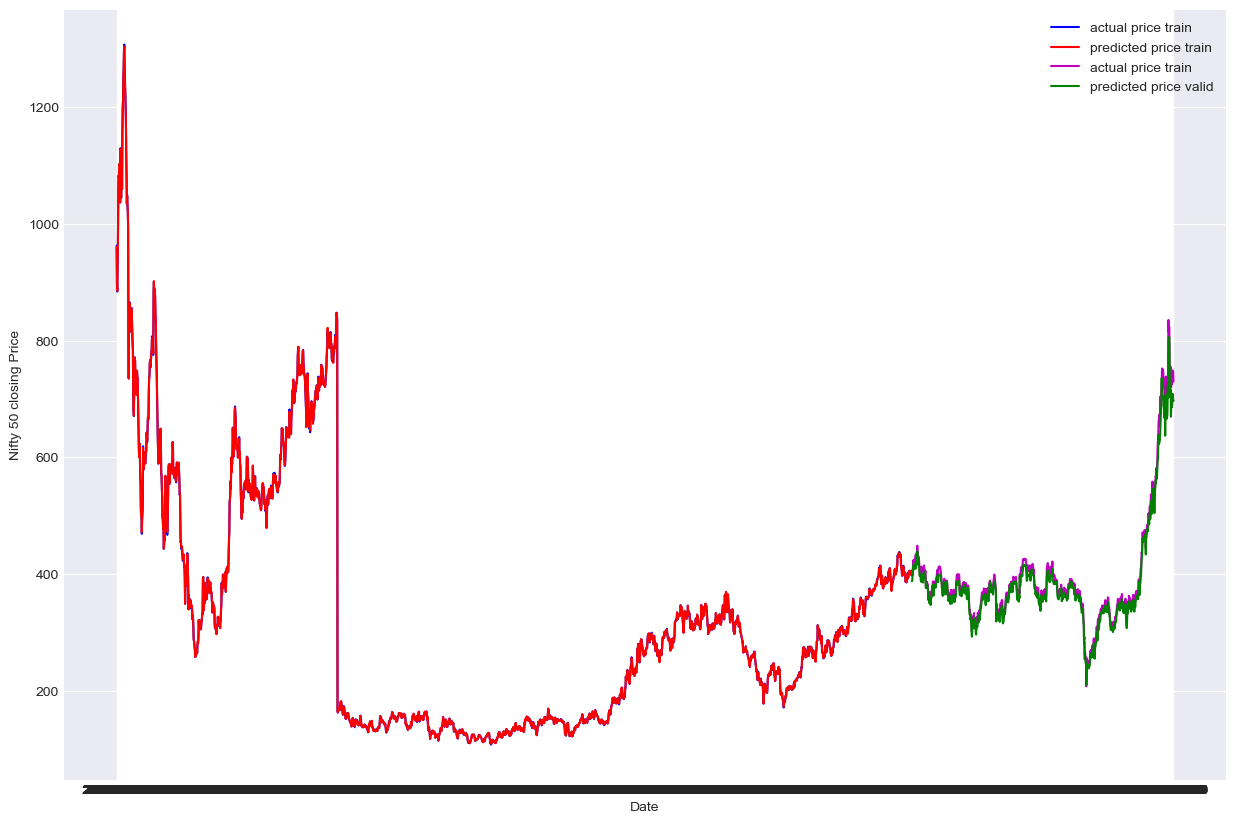

In [68]:
plt.figure(figsize = (15,10))
plt.plot(x_train2.index,list(y_trainn),label = "actual price train",color = "b")
plt.plot(x_train2.index,list(predicted_results_t),label = "predicted price train",color = "r")
plt.plot(x_valid2.index,list(y_validn),label = "actual price train",color = "m")
plt.plot(x_valid2.index,list(predicted_results_v),label = "predicted price valid",color = "g")

plt.xlabel("Date")
plt.ylabel("Nifty 50 closing Price")
plt.legend()
plt.show()